# Explore here

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Step 2: Exploration and Data Cleaning

In [69]:
# Obtain dimensions of dataframe
# (# rows, # coluns
total_data.shape

(41188, 21)

#total_data.columns

In [70]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [71]:
total_data.iloc[1]

age                        57
job                  services
marital               married
education         high.school
default               unknown
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  149
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 1, dtype: object

In [72]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
total_data.isnull().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [74]:
total_data['marital'].value_counts(normalize=True)

marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64

Total loan status of yes and no

In [75]:
total_data['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

The number of university degress vs non university degree

In [76]:
total_data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Age count for each participant

In [77]:
total_data['age'].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Basic descriptive

In [78]:
total_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [79]:
total_data.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

total_data.drop("PassengerId", axis = 1)#.duplicated().sum()

In [80]:
total_data.drop("nr.employed", axis = 1)#.duplicated().sum()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,yes


In [81]:
total_data[['job', 'y']]

,job,y
0,housemaid,no
1,services,no
2,services,no
3,admin.,no
4,services,no
...,...,...
41183,retired,yes
41184,blue-collar,no
41185,retired,no
41186,technician,yes


In [82]:
total_data[['marital', 'education']]

,marital,education
0,married,basic.4y
1,married,high.school
2,married,high.school
3,married,basic.6y
4,married,high.school
...,...,...
41183,married,professional.course
41184,married,professional.course
41185,married,university.degree
41186,married,professional.course


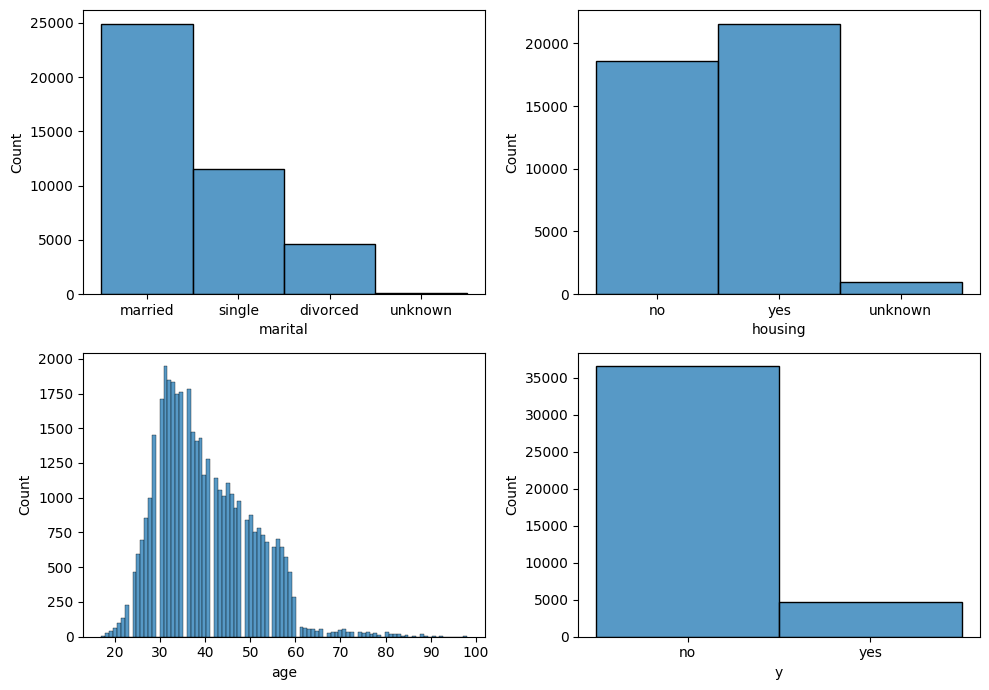

In [83]:
categorical_features = ['marital', 'age', 'housing', 'y']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "marital")
sns.histplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "housing")
sns.histplot(ax = axis[1, 1], data = total_data, x = "y")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

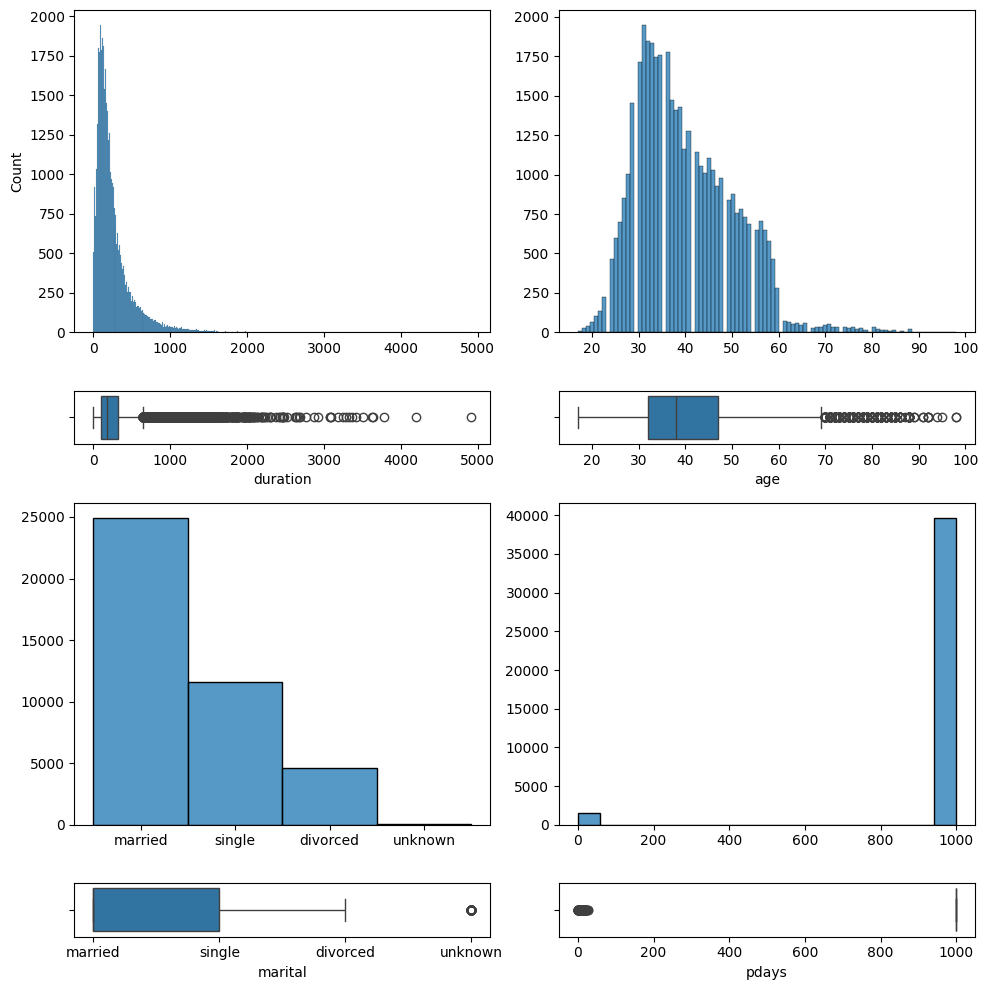

In [84]:
numerical_features = ['age', 'marital', 'housing', 'duration']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "duration")
sns.histplot(ax = axis[0, 1], data = total_data, x = "age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "age")

sns.histplot(ax = axis[2, 0], data = total_data, x = "marital").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "marital")
sns.histplot(ax = axis[2, 1], data = total_data, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "pdays")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

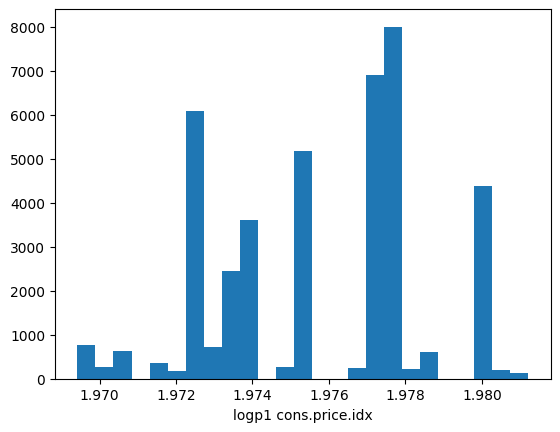

In [85]:
import numpy as np
plt.hist(np.log10(total_data['cons.price.idx']+1), bins=25)
plt.xlabel('logp1 cons.price.idx')
plt.show()

In [86]:
numerical_features

['age', 'marital', 'housing', 'duration']

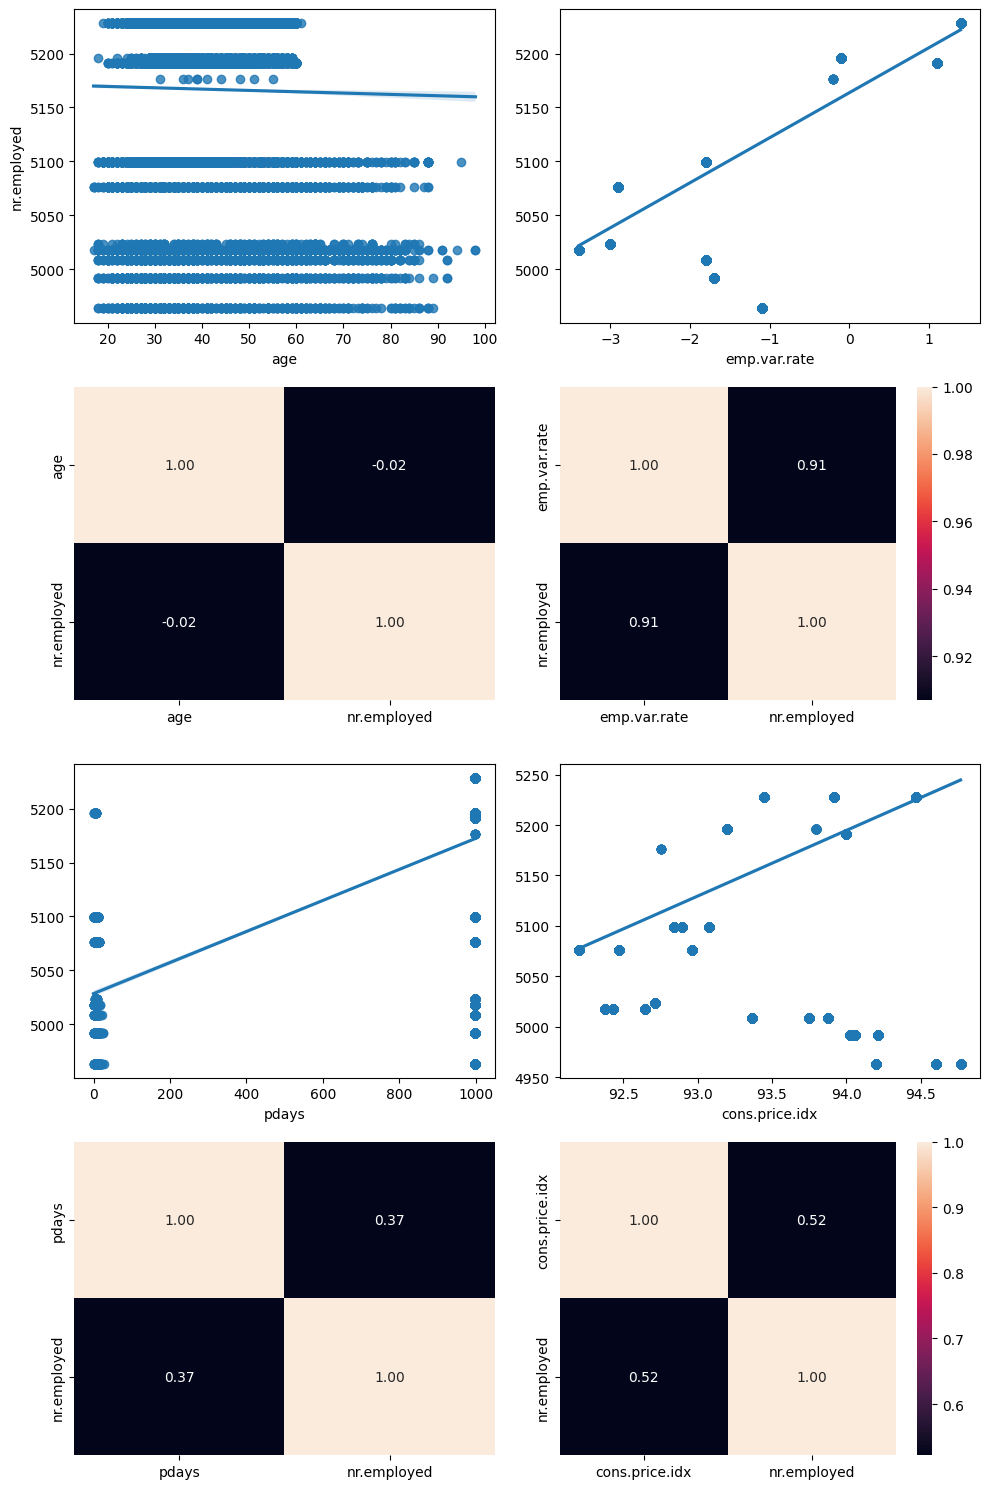

In [87]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "nr.employed")
sns.heatmap(total_data[["age", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "pdays", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["pdays", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "cons.price.idx", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["cons.price.idx", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

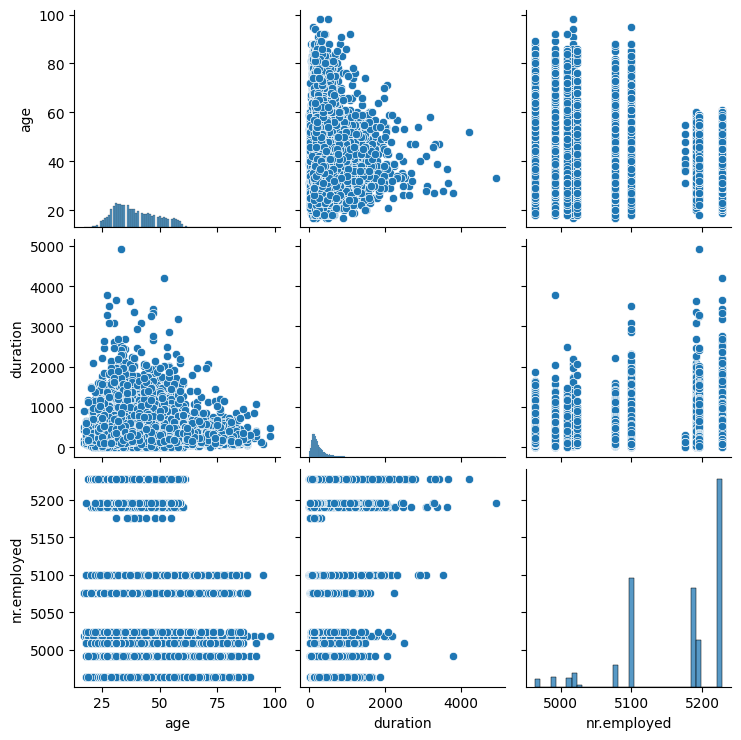

In [88]:
sns.pairplot(data = total_data[numerical_features + ['nr.employed']])

/home/vscode/.local/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

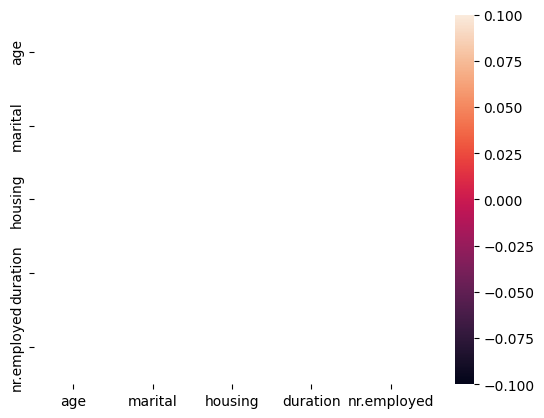

In [95]:

sns.heatmap(total_data[numerical_features + ['nr.employed']].corr(), annot = True, fmt = ".2f")

   



In [102]:
categorical_features

['marital', 'age', 'housing', 'y']

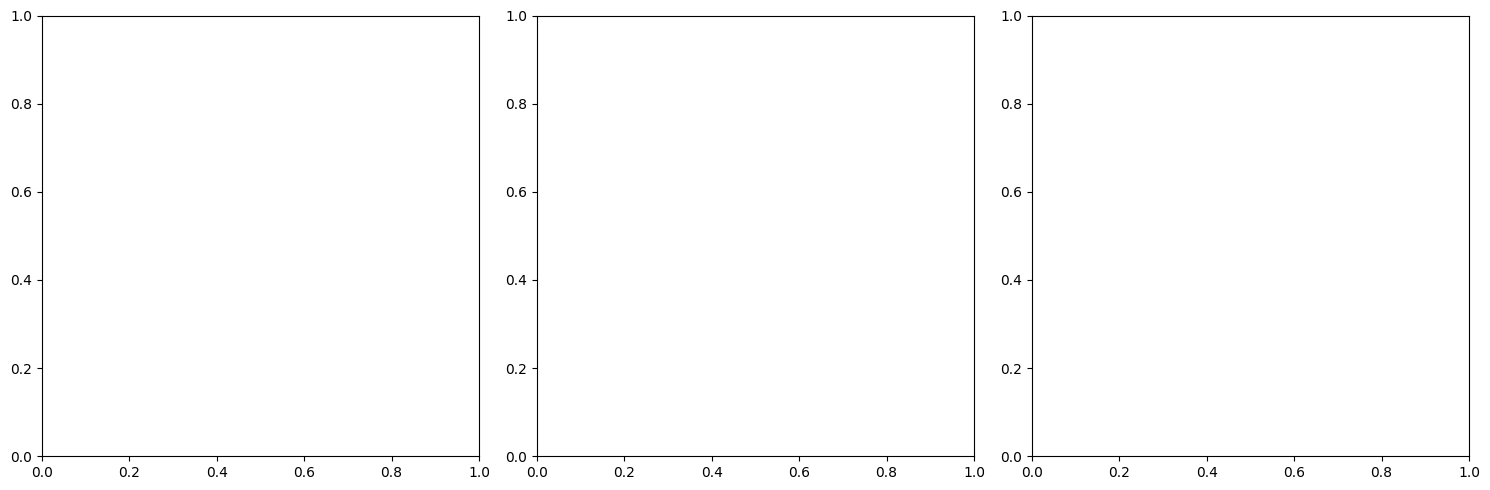

In [103]:
fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = total_data, x = "marital", hue = "nr.employed")
sns.countplot(ax = axis[1], data = total_data, x = "age", hue = "nr.employed").set(ylabel = None)
sns.countplot(ax = axis[2], data = total_data, x = "housing", hue = "nr.employed").set(ylabel = None)

plt.tight_layout()

plt.show()

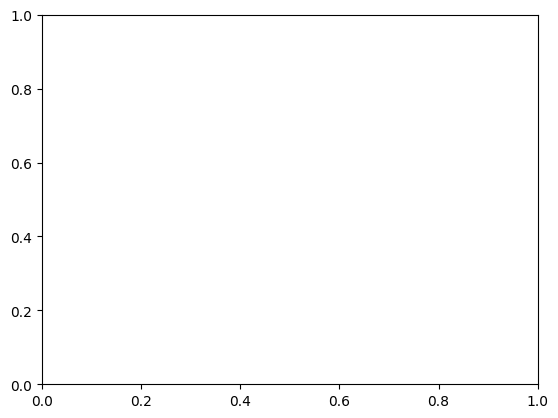

In [107]:
# Convert 'age' to a string if it is a categorical variable
total_data['age'] = total_data['age'].astype(str)

# Convert 'nr.employed' to numeric just in case it's read as a string
total_data['nr.employed'] = pd.to_numeric(total_data['nr.employed'], errors='coerce')

# Convert 'marital' to category if it has a manageable number of unique values
total_data['marital'] = total_data['marital'].astype('category')

# Now try the barplot again
sns.barplot(data=total_data, x='age', y='nr.employed', hue='marital')

plt.show()
